In [19]:
# Import basic library
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from os import listdir
import time

In [20]:
DIRECTORY = "data/"

In [21]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

Getting a list of the data and store it in a dataframe

In [5]:
filenames = pd.DataFrame(list_files(DIRECTORY, "subject"))

df = filenames[0].str.split(".", expand=True)
df["filename"] = filenames

df = df.rename(columns = {0:"subject", 1:"category"})
df['subject'] = df.subject.str.replace('subject', '')
df.apply(pd.to_numeric, errors='coerce').dropna()
df['subject'] = pd.to_numeric(df["subject"])
print(filenames)
df

                         0
0    subject01.centerlight
1        subject01.glasses
2          subject01.happy
3      subject01.leftlight
4      subject01.noglasses
..                     ...
160   subject15.rightlight
161          subject15.sad
162       subject15.sleepy
163    subject15.surprised
164         subject15.wink

[165 rows x 1 columns]


,subject,category,filename
0,1,centerlight,subject01.centerlight
1,1,glasses,subject01.glasses
2,1,happy,subject01.happy
3,1,leftlight,subject01.leftlight
4,1,noglasses,subject01.noglasses
...,...,...,...
160,15,rightlight,subject15.rightlight
161,15,sad,subject15.sad
162,15,sleepy,subject15.sleepy
163,15,surprised,subject15.surprised


Visualizing one image

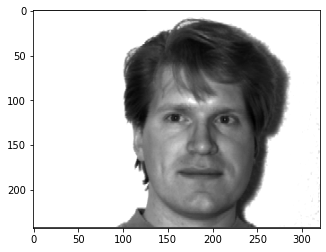

In [24]:
path = DIRECTORY + df["filename"][0]
img = plt.imread(path)
plt.imshow(img, cmap='gray')
plt.show()

Visualizing the whole data

In [ ]:
# visualizing the data
for i in range (len(df)):
    path = DIRECTORY + df["filename"][i]
    img = plt.imread(path)
    plt.imshow(img, cmap='gray')
    plt.show()

## Face Detection

In [7]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Face detection of one image

In [17]:
# Detect faces
faces = face_cascade.detectMultiScale(img, 1.1, 4)

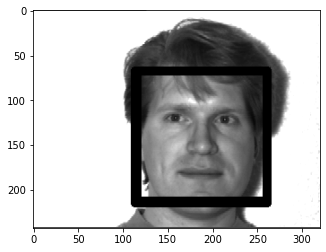

In [18]:
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 5)
# Display the output
plt.imshow(img, cmap='gray')
plt.show()

Face detection for the whole data

In [ ]:
for i in range (len(df)):
    path = DIRECTORY + df["filename"][0]
    img = plt.imread(path)
    # Detect faces
    faces = face_cascade.detectMultiScale(img, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 5)
    # Display the output
    plt.imshow(img, cmap='gray')
    plt.show()